Visualizations for Analyzing Approach 1

In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from approaches.approach1 import approach1_naive
from llms.llm_interaction import GroqClient

In [2]:
def get_dataset(dataset_string):
  with open(dataset_string, 'r') as file:
      data = json.load(file)
  return data

In [3]:
patient_records2_nl_query = get_dataset('datasets/patient_records2_nl_query.json')

Templates that explore different context information, specificity, and order of presenting information to the language model. Default template is the one used if no template is fed to approach1_naive().

In [4]:
default_template = ("""
                    Given the following patient record, answer the following natural language query: 
                    {nl_query} Return either true OR false, nothing else.\n\nPatient Record: {record_text}""")

prompt_template0 = ("""
Patient Data:
{record_text}
                    
Task:
Determine whether at least one match of the following query is implied or explicitly present in the patient data above.

Query:
{nl_query}

Return exactly one word: "True" or "False".
""")

prompt_template1 = ("""
Instruction: Given the following patient data, identify if it matches the following query: {nl_query}. Return either true or false, nothing else.
                    
Patient Data: {record_text}
""")

prompt_template2 = ("""
You are a clinical language analysis system.

Input:
- Patient Record: {record_text}
- Query: {nl_query}

Objective:
Assess whether the patient record includes the query.

Output:
Respond only with one word: True or False. Do not include explanations.
""")

prompt_template3 = ("""
Question:
Does the following patient record match the meaning of the given query?

Query: {nl_query}

Patient Record: {record_text}

Answer with a single Boolean value: True or False.
""")


Pipeline that feeds data through all provided prompt templates and queries each model specified. We explore 25 datapoints for this miniature experiment.

In [6]:
def run_approach1_naive_on_models(patient_records, models, prompt_templates):
    rows = []
    for model in models:
        llm_client = GroqClient(model=model)
        for i, template in enumerate(prompt_templates):
            output = approach1_naive(patient_records, llm_client, prompt_template=template)
            row = {
                "model": model,
                "id": str(i),
                "f1": output['f1'],
                "time-elapsed": output['time_elapsed']
                
            }
            rows.append(row)
    return rows

models = ["llama-3.3-70b-versatile", "qwen-2.5-32b", "gemma2-9b-it"]
prompt_templates = [default_template, prompt_template0, prompt_template1, prompt_template2, prompt_template3]
results = run_approach1_naive_on_models(patient_records2_nl_query[:25], models, prompt_templates)
df = pd.DataFrame(results)

Groq client initialized with model: llama-3.3-70b-versatile


Processing records: 100%|██████████| 25/25 [02:40<00:00,  6.40s/record]


accuracy of model over 25 generated records: 0.92
precision of model over 25 generated records: 0.8666666666666667
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.9285714285714286


Processing records: 100%|██████████| 25/25 [02:54<00:00,  6.98s/record]


accuracy of model over 25 generated records: 0.92
precision of model over 25 generated records: 0.8666666666666667
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.9285714285714286


Processing records: 100%|██████████| 25/25 [02:10<00:00,  5.23s/record]


accuracy of model over 25 generated records: 0.88
precision of model over 25 generated records: 0.8125
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.896551724137931


Processing records: 100%|██████████| 25/25 [02:01<00:00,  4.85s/record]


accuracy of model over 25 generated records: 0.88
precision of model over 25 generated records: 1.0
recall of model over 25 generated records: 0.7692307692307693
f1 of model over 25 generated records: 0.8695652173913044


Processing records: 100%|██████████| 25/25 [02:47<00:00,  6.70s/record]


accuracy of model over 25 generated records: 0.48
precision of model over 25 generated records: 0.0
recall of model over 25 generated records: 0.0
f1 of model over 25 generated records: 0.0
Groq client initialized with model: qwen-2.5-32b


Processing records: 100%|██████████| 25/25 [01:50<00:00,  4.41s/record]


accuracy of model over 25 generated records: 0.92
precision of model over 25 generated records: 1.0
recall of model over 25 generated records: 0.8461538461538461
f1 of model over 25 generated records: 0.9166666666666666


Processing records: 100%|██████████| 25/25 [02:49<00:00,  6.79s/record]


accuracy of model over 25 generated records: 0.96
precision of model over 25 generated records: 0.9285714285714286
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.962962962962963


Processing records: 100%|██████████| 25/25 [02:46<00:00,  6.65s/record]


accuracy of model over 25 generated records: 0.92
precision of model over 25 generated records: 1.0
recall of model over 25 generated records: 0.8461538461538461
f1 of model over 25 generated records: 0.9166666666666666


Processing records: 100%|██████████| 25/25 [02:02<00:00,  4.92s/record]


accuracy of model over 25 generated records: 0.92
precision of model over 25 generated records: 0.8666666666666667
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.9285714285714286


Processing records: 100%|██████████| 25/25 [02:24<00:00,  5.76s/record]


accuracy of model over 25 generated records: 0.96
precision of model over 25 generated records: 1.0
recall of model over 25 generated records: 0.9230769230769231
f1 of model over 25 generated records: 0.9600000000000001
Groq client initialized with model: gemma2-9b-it


Processing records: 100%|██████████| 25/25 [00:07<00:00,  3.53record/s]


accuracy of model over 25 generated records: 0.84
precision of model over 25 generated records: 0.7647058823529411
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.8666666666666666


Processing records: 100%|██████████| 25/25 [01:05<00:00,  2.62s/record]


accuracy of model over 25 generated records: 0.92
precision of model over 25 generated records: 0.8666666666666667
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.9285714285714286


Processing records: 100%|██████████| 25/25 [01:04<00:00,  2.58s/record]


accuracy of model over 25 generated records: 0.84
precision of model over 25 generated records: 0.7647058823529411
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.8666666666666666


Processing records: 100%|██████████| 25/25 [01:06<00:00,  2.66s/record]


accuracy of model over 25 generated records: 0.92
precision of model over 25 generated records: 0.8666666666666667
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.9285714285714286


Processing records: 100%|██████████| 25/25 [01:04<00:00,  2.57s/record]

accuracy of model over 25 generated records: 0.88
precision of model over 25 generated records: 0.8125
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.896551724137931


In [10]:
df

,model,id,f1,time-elapsed
0,llama-3.3-70b-versatile,0,0.928571,160.100748
1,llama-3.3-70b-versatile,1,0.928571,174.450423
2,llama-3.3-70b-versatile,2,0.896552,130.773914
3,llama-3.3-70b-versatile,3,0.869565,121.144702
4,llama-3.3-70b-versatile,4,0.000000,167.518893
5,qwen-2.5-32b,0,0.916667,110.178407
6,qwen-2.5-32b,1,0.962963,169.848840
7,qwen-2.5-32b,2,0.916667,166.281828
8,qwen-2.5-32b,3,0.928571,122.936157
9,qwen-2.5-32b,4,0.960000,144.052535


Visualization of F1 scores of different model outputs compared to ground truth labels when the specified prompt template is used.

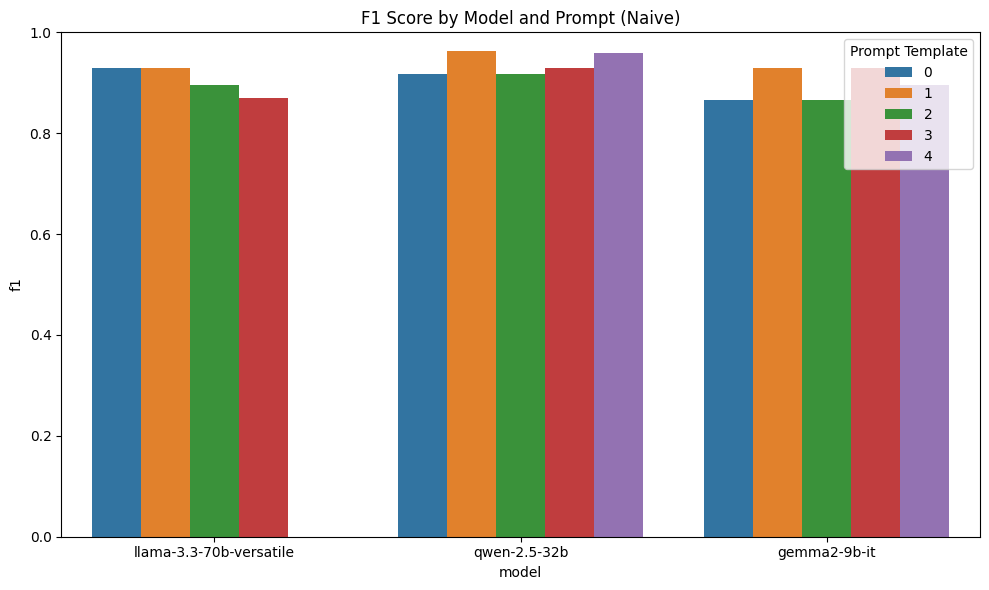

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="model", y="f1", hue="id")
plt.title("F1 Score by Model and Prompt (Naive)")
plt.ylim(0, 1)
plt.legend(title="Prompt Template")
plt.tight_layout()
plt.show()


Visualization of time taken by different models to generate the outputs using the specified prompt template.

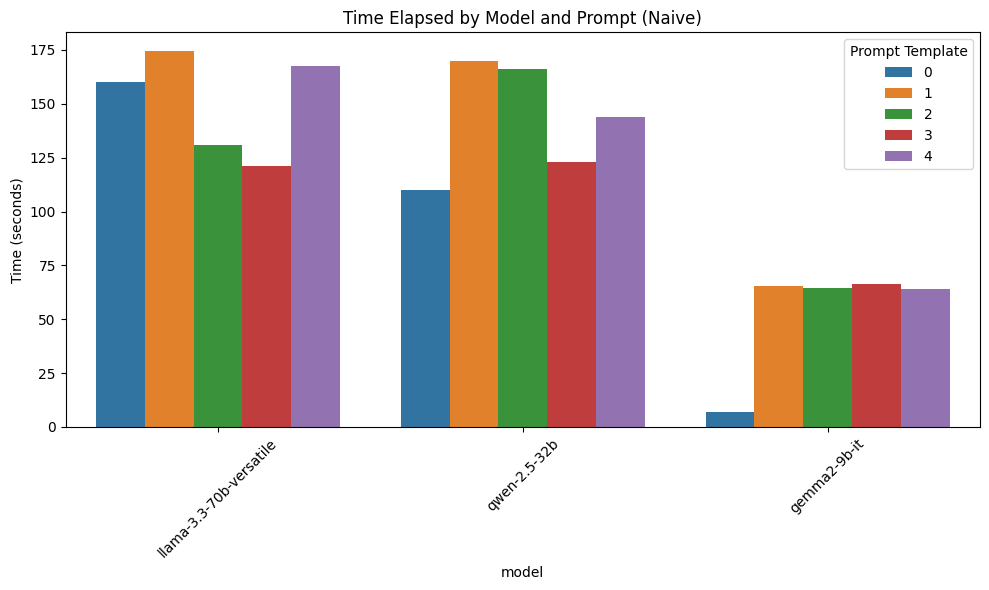

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="model", y="time-elapsed", hue="id")
plt.title("Time Elapsed by Model and Prompt (Naive)")
plt.ylabel("Time (seconds)")
plt.legend(title="Prompt Template")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

